# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [75]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [76]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [77]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [78]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [79]:
df = df_test.append(df_train).reset_index(drop=True)

In [10]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [12]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Неполное среднее', 'Два и более высших образования', 'Среднее специальное', 'Высшее', 'Неоконченное высшее', 'Ученая степень'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Гражданский брак', 'Не состоял в браке', 'Разведен(а)', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Строительство', 'Ресторанный бизнес/Общественное питание', 'Нефтегазовая промышленность', 'Энергетика', 'Сельское хозяйство', 'СМИ/Реклама/PR-агенства', 'Другие сферы', 'Транспорт', 'Салоны красоты и здоровья', 'Юридические услуги/нотариальные услуги', 'Подбор персонала', 'Государственная служба', 'Образование', 'Маркетинг', 'Страхование', 'Здравоохранение', 'Недвижимость', 'Металлургия/Промышленность/Машиностроение', 'Наука', 'Логистика', 'ЧОП/Детективная д-ть', 'Сборочные производства', 'Банк/Финансы', 'Развлечения/Искусство', 'Информационные технологии', 'Коммунальное хоз-во/Дорожные службы', 'Управляющая компания', 'Информационные услуги', 'Туризм', 'Химия/Парфюмерия/Фармацевтика', 'Торговля'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [13]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [14]:
df.isnull().sum()

AGREEMENT_RK                      0
TARGET                            0
AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     590
REGION_NM                         2
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL              

In [80]:
df1 = df
for i in df1.columns[df1.isna().any()].tolist():
    df1 = df1[~df1[i].isnull()]
#Другой вариант: df1 = df1.dropna()
print(df1.isnull().sum())
print("Потеряно данных (в %):")
100-len(df1)*100/len(df)

AGREEMENT_RK                  0
TARGET                        0
AGE                           0
SOCSTATUS_WORK_FL             0
SOCSTATUS_PENS_FL             0
GENDER                        0
CHILD_TOTAL                   0
DEPENDANTS                    0
EDUCATION                     0
MARITAL_STATUS                0
GEN_INDUSTRY                  0
GEN_TITLE                     0
ORG_TP_STATE                  0
ORG_TP_FCAPITAL               0
JOB_DIR                       0
FAMILY_INCOME                 0
PERSONAL_INCOME               0
REG_ADDRESS_PROVINCE          0
FACT_ADDRESS_PROVINCE         0
POSTAL_ADDRESS_PROVINCE       0
TP_PROVINCE                   0
REGION_NM                     0
REG_FACT_FL                   0
FACT_POST_FL                  0
REG_POST_FL                   0
REG_FACT_POST_FL              0
REG_FACT_POST_TP_FL           0
FL_PRESENCE_FL                0
OWN_AUTO                      0
AUTO_RUS_FL                   0
HS_PRESENCE_FL                0
COT_PRES

98.15816546643215

In [ ]:
df1 = df
df1.fillna(0, inplace=True)
df1.isnull().sum()

In [ ]:
df1 = df
for i in df1.columns[df1.isna().any()].tolist():
    df1.loc[df1[i].isnull(), i] = df1[i].mode()[0]
#Другой вариант: df1 = df1.fillna(df1.mode().loc[0]) 
df1.isnull().sum()

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
print("Категориальные признаки содержатся в следующих столбцах:")
df.select_dtypes(include=object).columns

In [ ]:
df1 = df.drop(df.select_dtypes(include=object).columns, axis=1)
print("Категориальные признаки содержатся в следующих столбцах:")
df1.select_dtypes(include=object).columns

In [ ]:
df1 = pd.get_dummies(df, columns=['EDUCATION'])
print("Категориальные признаки содержатся в следующих столбцах:")
print(df1.select_dtypes(include=object).columns)
print("Количество столбцов возросло на:")
len(df1.columns)-len(df.columns)

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [85]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    #Удаляем идентификатор и добавленный нами столбец sample (вернем его позже)
    df_output = df_output.drop(['AGREEMENT_RK','sample'], axis=1)
    #Меняем запятую на точку
    cloumns_with_comma = ['PERSONAL_INCOME','CREDIT','FST_PAYMENT','LOAN_AVG_DLQ_AMT','LOAN_MAX_DLQ_AMT']
    df_output[cloumns_with_comma] = df_output[cloumns_with_comma].apply(lambda x: x.str.replace(',', '.')).astype('float')
    #Заменяем пропуска на моду
    df_output = df_output.fillna(df_output.mode().loc[0])
    #Кодируем категориальные признаки
    df_output = pd.get_dummies(df_output, columns=df_output.select_dtypes(include=object).columns)
    #Возвращаем sample
    df_output['sample'] = df_input['sample']
    
    return df_output

In [87]:
df1 = df.pipe(preproc_data)
print(df1.info())
print("Количество столбцов с категориальными признаками:")
print(len(df1.select_dtypes(include=object).columns))
print("Количество столбцов с пропусками:")
len(df1.columns[df1.isna().any()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 444 entries, TARGET to sample
dtypes: float64(7), int64(31), object(1), uint8(405)
memory usage: 20.6+ MB
None
Количество столбцов с категориальными признаками:
1
Количество столбцов с пропусками:


0

In [213]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [214]:
from sklearn.model_selection import train_test_split
y = df_train_preproc['TARGET']
y2 = df_test_preproc['TARGET']
df_train_preproc = df_train_preproc.drop('TARGET', axis=1)
df_test_preproc = df_test_preproc.drop('TARGET', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_train_preproc, y, test_size=0.3, random_state=42)

#### Задание 5. Обучение и оценка качества разных моделей

In [65]:
#from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Я без понятия, что мне следует тут писать, тк никакого задания пока не дано.

In [216]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
predict_dtc = model_dtc.predict(X_test) 

#RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
predict_rfc = model_rfc.predict(X_test) 

#LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
predict_lr = model_lr.predict(X_test) 

c:\users\александр\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\александр\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [217]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Decision Tree Classifier:")
print('precision', precision_score(y_test, predict_dtc))
print('recall', recall_score(y_test, predict_dtc))
print('accuracy', accuracy_score(y_test, predict_dtc))
print()

print("Random Forest Classifier:")
print('precision', precision_score(y_test, predict_rfc))
print('recall', recall_score(y_test, predict_rfc))
print('accuracy', accuracy_score(y_test, predict_rfc))
print()

print("Logistic Regression:")
print('precision', precision_score(y_test, predict_lr))
print('recall', recall_score(y_test, predict_lr))
print('accuracy', accuracy_score(y_test, predict_lr))

Decision Tree Classifier:
precision 0.15780141843971632
recall 0.16036036036036036
accuracy 0.7939566455003284

Random Forest Classifier:
precision 0.26666666666666666
recall 0.007207207207207207
accuracy 0.8769432888110357

Logistic Regression:
precision 0.2857142857142857
recall 0.0036036036036036037
accuracy 0.877819137289249


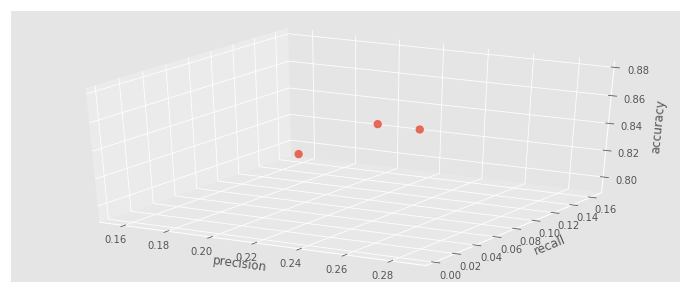

In [218]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

#Я не понял, как это сделать лучше, чем рисовать 3D модель (которые мы особо не изучали).
#Напишите пожалуйста, как следовало это сделать. В уроке примеров не нашел.

from matplotlib import cm
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

visulaiser_d = {
    'precision':[precision_score(y_test, predict_dtc),precision_score(y_test, predict_rfc),precision_score(y_test, predict_lr)],
    'recall':[recall_score(y_test, predict_dtc),recall_score(y_test, predict_rfc),recall_score(y_test, predict_lr)],
    'accuracy':[accuracy_score(y_test, predict_dtc),accuracy_score(y_test, predict_rfc),accuracy_score(y_test, predict_lr)]
    }
visualiser = pd.DataFrame(data=visulaiser_d, columns=['precision','recall','accuracy'])

fig = plt.figure().gca(projection='3d')
fig.scatter(visualiser['precision'], visualiser['recall'], visualiser['accuracy'], 
                 s=80, alpha=0.8, edgecolors='w')
fig.set_xlabel('precision')
fig.set_ylabel('recall')
fig.set_zlabel('accuracy')

plt.show()

c:\users\александр\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


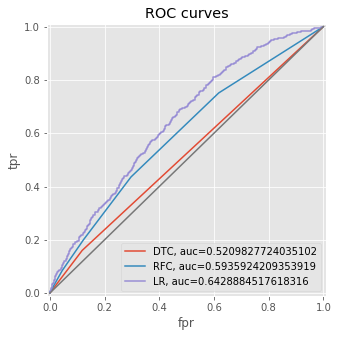

In [219]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

predict_proba_dtc = model_dtc.predict_proba(X_test)
predict_proba_rfc = model_rfc.predict_proba(X_test)
predict_proba_lr = model_lr.predict_proba(X_test)

fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, predict_proba_dtc[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, predict_proba_rfc[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, predict_proba_lr[:,1])

plt.figure(figsize=(5, 5))

auc_dtc = metrics.roc_auc_score(y_test, predict_proba_dtc[:,1])
auc_rfc = metrics.roc_auc_score(y_test, predict_proba_rfc[:,1])
auc_lr = metrics.roc_auc_score(y_test, predict_proba_lr[:,1])

plt.plot(fpr_dtc, tpr_dtc, label="DTC, auc="+str(auc_dtc))
plt.plot(fpr_rfc, tpr_rfc, label="RFC, auc="+str(auc_rfc))
plt.plot(fpr_lr, tpr_lr, label="LR, auc="+str(auc_lr))

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curves')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

In [220]:
from sklearn.model_selection import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

cross_val_score_dtc = cross_val_score(model_dtc, X_train, y_train, scoring='roc_auc', cv=10)
print("Средний roc_auc Decision Tree Classifier:")
print(cross_val_score_dtc.mean())

cross_val_score_rfc = cross_val_score(model_rfc, X_train, y_train, scoring='roc_auc', cv=10)
print("Средний roc_auc Random Forest Classifier:")
print(cross_val_score_rfc.mean())

cross_val_score_lr = cross_val_score(model_lr, X_train, y_train, scoring='roc_auc', cv=10)
print("Средний roc_auc Logistic Regression:")
print(cross_val_score_lr.mean())

Средний roc_auc Decision Tree Classifier:
0.5185512025878486
Средний roc_auc Random Forest Classifier:
0.5940458246124


c:\users\александр\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\александр\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\александр\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\александр\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\александр\appdata\local\programs\py

Средний roc_auc Logistic Regression:
0.6373581967062762


In [221]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

predict_proba = model_lr.predict_proba(df_test_preproc)
print(predict_proba)

[[0.84264635 0.15735365]
 [0.94123013 0.05876987]
 [0.81437204 0.18562796]
 ...
 [0.81574466 0.18425534]
 [0.94749798 0.05250202]
 [0.8087922  0.1912078 ]]


c:\users\александр\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Roc_auc составил:
0.6232162831089882


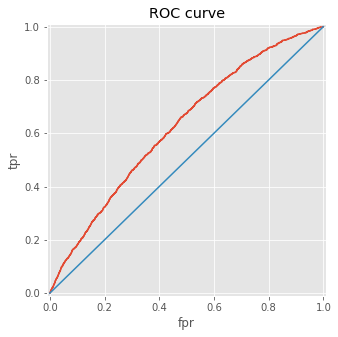

In [222]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

fpr, tpr, thresholds = roc_curve(y2, predict_proba[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

auc = metrics.roc_auc_score(y2, predict_proba[:,1])
print("Roc_auc составил:")
print(auc)

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [ ]:
### И далее ;)